<a href="https://colab.research.google.com/github/tarupathak30/Deep-Learning-/blob/main/cnn/cnn_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import layers, models
from keras.datasets import cifar10

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [3]:
# normalizing the pixel values
x_train = x_train / 255.0
x_test = x_test / 255.0

In [4]:
x_train.shape

(50000, 32, 32, 3)

Text(0.5, 1.0, 'Label : [9]')

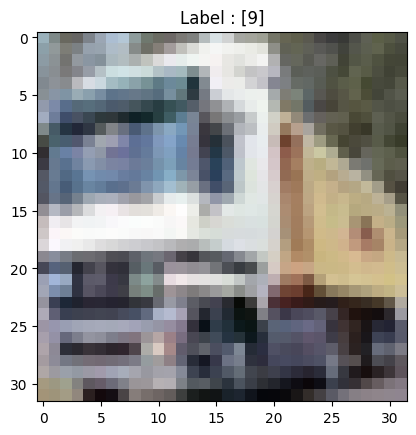

In [5]:
import matplotlib.pyplot as plt
plt.imshow(x_train[1])
plt.title(f"Label : {y_train[1]}")

In [6]:
y_train_values = set(y_train.flatten())

In [7]:
y_train_values

{np.uint8(0),
 np.uint8(1),
 np.uint8(2),
 np.uint8(3),
 np.uint8(4),
 np.uint8(5),
 np.uint8(6),
 np.uint8(7),
 np.uint8(8),
 np.uint8(9)}

In [8]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),


    layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),

    # classification head
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:
history = model.fit(x_train, y_train, epochs=30, batch_size=64, validation_split=0.2)

Epoch 1/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.3530 - loss: 2.1281 - val_accuracy: 0.4882 - val_loss: 1.4852
Epoch 2/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.5801 - loss: 1.1813 - val_accuracy: 0.5894 - val_loss: 1.1250
Epoch 3/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.6602 - loss: 0.9626 - val_accuracy: 0.6942 - val_loss: 0.8983
Epoch 4/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.7110 - loss: 0.8217 - val_accuracy: 0.6409 - val_loss: 1.0377
Epoch 5/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.7309 - loss: 0.7597 - val_accuracy: 0.7292 - val_loss: 0.8165
Epoch 6/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.7610 - loss: 0.6897 - val_accuracy: 0.7690 - val_loss: 0.6609
Epoch 7/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.7706 - loss: 0.6438 - val_accuracy: 0.7335 - val_loss: 0.7736
Epoch 8/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.7871 - loss: 0.6005 - val_accur

In [11]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test loss : {test_loss}")
print(f"Test accuracy : {test_accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8359 - loss: 0.5776
Test loss : 0.5722782611846924
Test accuracy : 0.833899974822998


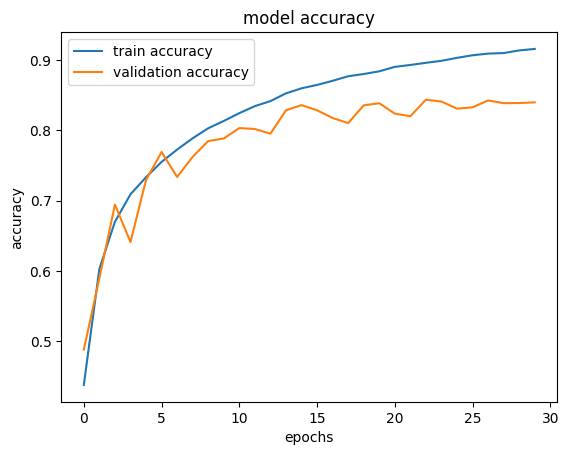

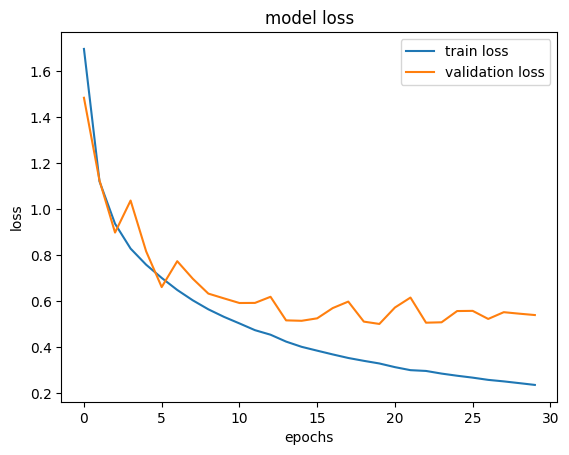

In [13]:
import matplotlib.pyplot as plt

# plot accuracy
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.title("model accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

# plot loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title("model loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

Data Augmentation using image data generator

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [17]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip = True,
    zoom_range=0.1
)

datagen.fit(x_train)

In [18]:
history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                    steps_per_epoch=len(x_train)//64,
                    epochs=30,
                    validation_data=(x_test, y_test))

Epoch 1/30


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


781/781 ━━━━━━━━━━━━━━━━━━━━ 47s 49ms/step - accuracy: 0.7593 - loss: 0.7717 - val_accuracy: 0.8336 - val_loss: 0.4950
Epoch 2/30
  1/781 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.7656 - loss: 0.6763

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7656 - loss: 0.6763 - val_accuracy: 0.8324 - val_loss: 0.4952
Epoch 3/30
781/781 ━━━━━━━━━━━━━━━━━━━━ 35s 44ms/step - accuracy: 0.7840 - loss: 0.6379 - val_accuracy: 0.8142 - val_loss: 0.5511
Epoch 4/30
781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7656 - loss: 0.7532 - val_accuracy: 0.8140 - val_loss: 0.5529
Epoch 5/30
781/781 ━━━━━━━━━━━━━━━━━━━━ 39s 43ms/step - accuracy: 0.7920 - loss: 0.5998 - val_accuracy: 0.8172 - val_loss: 0.5425
Epoch 6/30
781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7969 - loss: 0.5370 - val_accuracy: 0.8183 - val_loss: 0.5410
Epoch 7/30
781/781 ━━━━━━━━━━━━━━━━━━━━ 38s 41ms/step - accuracy: 0.7972 - loss: 0.5890 - val_accuracy: 0.8234 - val_loss: 0.5323
Epoch 8/30
781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8281 - loss: 0.4382 - val_accuracy: 0.8233 - val_loss: 0.5347
Epoch 9/30
781/781 ━━━━━━━━━━━━━━━━━━━━ 31s 40ms/step - accuracy: 0.8024 - loss: 0.5709 - val_accuracy: 0.816

In [20]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy with ImageDataGenerator : {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8366 - loss: 0.4953
Test Accuracy with ImageDataGenerator : 0.8349999785423279


implementing using keras.layers Augmentation, now we will integrate augmentation layers directly into the model

In [21]:
augmentation = models.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomTranslation(0.1, 0.1),
])

In [22]:
model = models.Sequential([
    augmentation,
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),


    layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),

    # classification head
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [26]:
history_layers = model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test))

Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 21ms/step - accuracy: 0.7818 - loss: 0.6383 - val_accuracy: 0.7622 - val_loss: 0.7225
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - accuracy: 0.7823 - loss: 0.6267 - val_accuracy: 0.7708 - val_loss: 0.6949
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - accuracy: 0.7791 - loss: 0.6331 - val_accuracy: 0.7530 - val_loss: 0.7419
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - accuracy: 0.7836 - loss: 0.6253 - val_accuracy: 0.8031 - val_loss: 0.5865
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 20ms/step - accuracy: 0.7854 - loss: 0.6247 - val_accuracy: 0.7925 - val_loss: 0.6186
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 0.7887 - loss: 0.6097 - val_accuracy: 0.7864 - val_loss: 0.6566
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - accuracy: 0.7846 - loss: 0.6195 - val_accuracy: 0.7922 - val_loss: 0.6250
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - accuracy: 0.7927 - loss: 0.5974 - 

In [27]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy with keras.layers augmentation", {test_accuracy})

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8411 - loss: 0.4927
Test accuracy with keras.layers augmentation {0.8414000272750854}


improved accuracy from "77% to 84%" by increasing the number of epochs, data augmentation makes the task harder due to rotation, shifts, zoom and flips, makes the network see distorted versions of the original frames.

   the model has to generalize across more variations instead of just memorizing training images.

   training longer, increasing epoch time can help.
